In [1]:
from sympy import Matrix, Rational
import matplotlib.pyplot as plt
import numpy as np
#implement from scratch the interpolator class


In [2]:
points=[]
points_=[]
p=2
k=0
n=(p+1)*(p+2)//2
print("number of coeff = ",n)
for i in range(0,p+1):
    for j in range(0,p+1):
        k=k+1
        if ((Rational(j,p)+Rational(i,p))<=Rational(1,1)):
            print('x = ',Rational(j,p),' y = ',Rational(i,p)) 
            p_=[Rational(j,p),Rational(i,p)]
            points.append(p_)
            points_.append([j/p,i/p])
print(len(points_))

number of coeff =  6
x =  0  y =  0
x =  1/2  y =  0
x =  1  y =  0
x =  0  y =  1/2
x =  1/2  y =  1/2
x =  0  y =  1
6


In [3]:
points_=np.array(points_)
print(points_)

[[0.  0. ]
 [0.5 0. ]
 [1.  0. ]
 [0.  0.5]
 [0.5 0.5]
 [0.  1. ]]


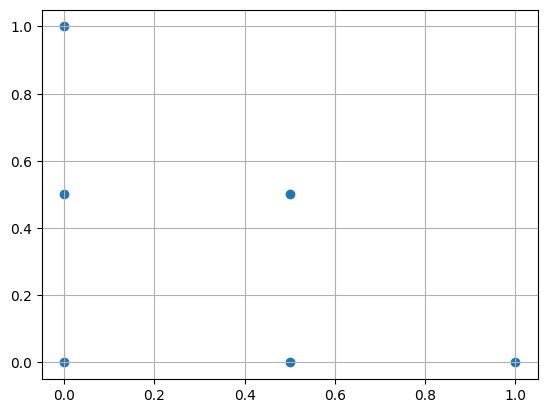

In [4]:
plt.figure()
plt.scatter(points_[:,0],points_[:,1])
plt.grid()
plt.show()

In [5]:
def generate_pairs(r):
    pairs = []
    for i in range(0, r+1):
        for j in range(0, r+1):
            if  i + j <= r:
                pairs.append((j, i))
    return pairs

In [6]:
def show_pol(r,sol):
    for ii,(i,j) in enumerate(generate_pairs(r)):
        print(sol[ii],'x^',i,'y^',j,end=' ')

In [7]:
couples=generate_pairs(p)

#b=np.zeros(shape=(n),dtype=np.float64)
list=[]
for ii in range(n):
    temp=[]
    for jj,(i,j) in enumerate(couples):
       # A[ii,jj]=((points[ii][0])**i )*((points[ii][1])**j)
        temp.append(((points[ii][0])**i )*((points[ii][1])**j))
    list.append(temp)
print(list)

temp=[Rational(0,1) for i in range(n)]
temp[0]=Rational(1,1)


[[1, 0, 0, 0, 0, 0], [1, 1/2, 1/4, 0, 0, 0], [1, 1, 1, 0, 0, 0], [1, 0, 0, 1/2, 0, 1/4], [1, 1/2, 1/4, 1/2, 1/4, 1/4], [1, 0, 0, 1, 0, 1]]


In [8]:
A = Matrix(list)
b = Matrix(temp)


coeff=[]
# Print the solution
print("Solution:")
for ii in range(n):
    temp=[Rational(0,1) for i in range(n)]
    temp[ii]=Rational(1,1)
    b = Matrix(temp)

    solution = A.solve(b)
    s='basis function number : '
    print("\033[1m" + s + "\033[0m",ii+1)
    show_pol(p,solution)
    print()
    coeff.append(solution)

Solution:
basis function number :  1
1 x^ 0 y^ 0 -3 x^ 1 y^ 0 2 x^ 2 y^ 0 -3 x^ 0 y^ 1 4 x^ 1 y^ 1 2 x^ 0 y^ 2 
basis function number :  2
0 x^ 0 y^ 0 4 x^ 1 y^ 0 -4 x^ 2 y^ 0 0 x^ 0 y^ 1 -4 x^ 1 y^ 1 0 x^ 0 y^ 2 
basis function number :  3
0 x^ 0 y^ 0 -1 x^ 1 y^ 0 2 x^ 2 y^ 0 0 x^ 0 y^ 1 0 x^ 1 y^ 1 0 x^ 0 y^ 2 
basis function number :  4
0 x^ 0 y^ 0 0 x^ 1 y^ 0 0 x^ 2 y^ 0 4 x^ 0 y^ 1 -4 x^ 1 y^ 1 -4 x^ 0 y^ 2 
basis function number :  5
0 x^ 0 y^ 0 0 x^ 1 y^ 0 0 x^ 2 y^ 0 0 x^ 0 y^ 1 4 x^ 1 y^ 1 0 x^ 0 y^ 2 
basis function number :  6
0 x^ 0 y^ 0 0 x^ 1 y^ 0 0 x^ 2 y^ 0 -1 x^ 0 y^ 1 0 x^ 1 y^ 1 2 x^ 0 y^ 2 


In [18]:
M=np.ones((n,n),dtype=np.float64)
for i in range(n):
    for j in range(n):
        M[i,j]=float(coeff[i][j])

In [10]:
print(M)
print(type(M[0,0]))

[[ 1. -3.  2. -3.  4.  2.]
 [ 0.  4. -4.  0. -4.  0.]
 [ 0. -1.  2.  0.  0.  0.]
 [ 0.  0.  0.  4. -4. -4.]
 [ 0.  0.  0.  0.  4.  0.]
 [ 0.  0.  0. -1.  0.  2.]]
<class 'numpy.float64'>


In [11]:

#change this so that you can eval everything in one shot




def eval(M,point,val):
    x=np.ones((n,1),dtype=np.float64)
    for ii,(i,j) in enumerate(generate_pairs(p)):
        x[ii]=(point[0]**i)*(point[1]**j)
    
    print(x)

    res=np.matmul(val,np.matmul(M,x))
    print(res)

    print(float(res))




val=np.ones((1,n),dtype=np.float64)
val[0,1]=2.0
val[0,2]=3.0
print(val)
point=np.array([0.8, 0.1],dtype=np.float64)

eval(M,point,val)

[[1. 2. 3. 1. 1. 1.]]
[[1.  ]
 [0.8 ]
 [0.64]
 [0.1 ]
 [0.08]
 [0.01]]
[[2.28]]
2.2800000000000002


In [12]:
import numpy as np
from scipy.interpolate import LinearNDInterpolator

# Define vertices of the reference triangle
vertices = np.array([[0, 0], [1, 0], [0, 1]])

# Values at the vertices of the triangle
values = np.array([1, 2, 3])

# Define points where you want to interpolate within the triangle
interpolation_points = np.array([[0.2, 0.3], [0.5, 0.5], [0.8, 0.1]])

# Create a LinearNDInterpolator object
interpolator = LinearNDInterpolator(vertices, values)

# Perform linear interpolation at specified points
interpolated_values = interpolator(interpolation_points)

print("Interpolated values:", interpolated_values)


Interpolated values: [1.8 2.5 2. ]


In [13]:
#derive
r=p


def generate_pairs_der(r):
    der_x=[]
    der_y=[]

    for (i,j) in generate_pairs(r):
        if (i-1)>=0:
            der_x.append(((i-1),j))
        if (j-1)>=0:
            der_y.append((i,(j-1)))

    return der_x,der_y


print(generate_pairs(r))

print(generate_pairs_der(r))


[(0, 0), (1, 0), (2, 0), (0, 1), (1, 1), (0, 2)]
([(0, 0), (1, 0), (0, 1)], [(0, 0), (1, 0), (0, 1)])


In [14]:
def calculate_der(M,r):
    coeff_dx=[]
    coeff_dy=[]
    for ii in range(n):
        temp_x=[]
        temp_y=[]
        for jj,(i,j) in enumerate(generate_pairs(r)):
            if (i-1)>=0:
                temp_x.append(Rational(i,1)*coeff[ii][jj])
            if (j-1)>=0:
                temp_y.append(Rational(j,1)*coeff[ii][jj])
        coeff_dx.append(temp_x)
        coeff_dy.append(temp_y)
    return coeff_dx,coeff_dy

In [15]:
coeff_dx,coeff_dy=calculate_der(M,r)
print(coeff_dx,coeff_dy)

[[-3, 4, 4], [4, -8, -4], [-1, 4, 0], [0, 0, -4], [0, 0, 4], [0, 0, 0]] [[-3, 4, 4], [0, -4, 0], [0, 0, 0], [4, -4, -8], [0, 4, 0], [-1, 0, 4]]
